In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.stem import PorterStemmer

import snowballstemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.feature_extraction.text import TfidfVectorizer

from model.Network import Network
from model.FCLayer import FCLayer
from model.ActivationLayer import ActivationLayer
from helpers.ActivationFunctions import tanh, tanh_prime
from helpers.LossFunctions import mse, mse_prime
from sklearn.preprocessing import LabelEncoder


nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /home/mo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
tweets_df = pd.read_csv("tweet_emotions.csv") 

In [4]:
tweets_df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [5]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [6]:
tweets_df.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [7]:
tweets_df.duplicated().sum()

0

In [8]:
tweets_df.describe()

,tweet_id
count,4.000000e+04
mean,1.845184e+09
std,1.188579e+08
min,1.693956e+09
25%,1.751431e+09
50%,1.855443e+09
75%,1.962781e+09
max,1.966441e+09


In [9]:
tweets_df.drop('tweet_id', axis=1, inplace=True)

In [10]:
tweets_df.describe()

,sentiment,content
count,40000,40000
unique,13,39827
top,neutral,I just received a mothers day card from my lov...
freq,8638,14


In [11]:
tweets_df['sentiment'].value_counts()

sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64

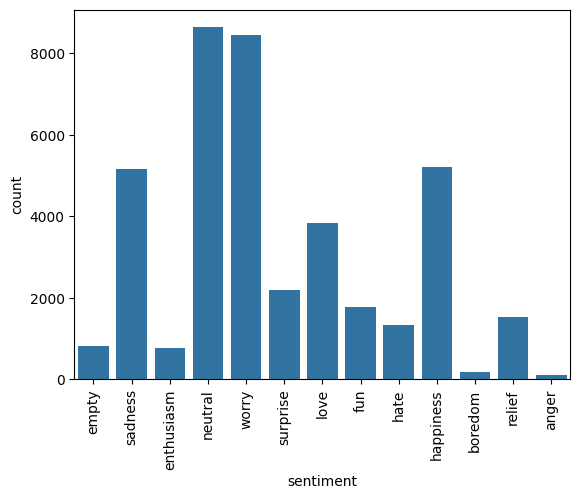

In [12]:
sns.countplot(x=tweets_df['sentiment'])
plt.xticks(rotation=90)
plt.show()

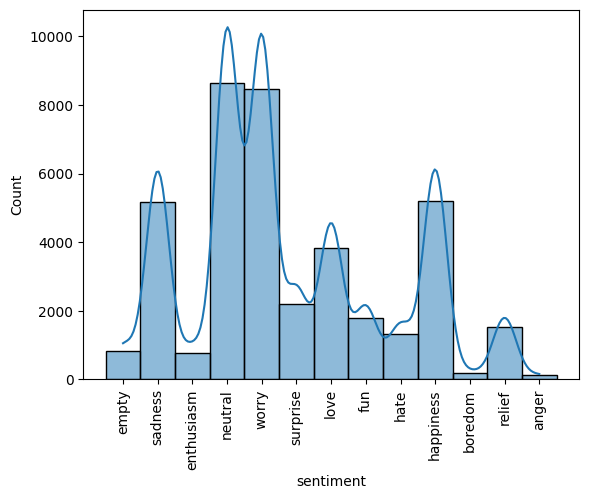

In [13]:
sns.histplot(x=tweets_df['sentiment'], kde=True)
plt.xticks(rotation=90)
plt.show()

In [14]:
stop_words = stopwords.words('english')
stemmer = PorterStemmer()

In [15]:
def clean_text(text):
    text = text.lower()
    text = re.sub('[^\w\s]', '', text)
    text = [word for word in text.split() if word not in stop_words]
    text = [stemmer.stem(w) for w in text]
    return text

In [16]:
tweets_df["text"] = tweets_df["content"].apply(lambda x: clean_text(x))
tweets_df["text"] = tweets_df["text"].apply(lambda x: ' '.join(x))

In [17]:
tweets_df.head()

,sentiment,content,text
0,empty,@tiffanylue i know i was listenin to bad habi...,tiffanylu know listenin bad habit earlier star...
1,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed headach ughhhhwaitin call
2,sadness,Funeral ceremony...gloomy friday...,funer ceremonygloomi friday
3,enthusiasm,wants to hang out with friends SOON!,want hang friend soon
4,neutral,@dannycastillo We want to trade with someone w...,dannycastillo want trade someon houston ticket...


In [25]:
all_words = ' '.join(word for word in tweets_df['text'])
y = np.array(tweets_df['sentiment'])
x = np.array(tweets_df['text'])


In [26]:
le = LabelEncoder()
y = le.fit_transform(y)
vec = TfidfVectorizer()
X = vec.fit_transform(x)


In [27]:
print(y)
print(X)

[ 2 10 10 ...  7  5  7]
  (0, 31824)	0.2934084625101732
  (0, 14632)	0.34280305040282527
  (0, 39603)	0.2327953613191101
  (0, 12209)	0.3224283469932685
  (0, 16607)	0.4125723417050342
  (0, 4258)	0.22220654349486726
  (0, 25090)	0.39876734123808133
  (0, 23723)	0.190319174278408
  (0, 42089)	0.4726683381795447
  (1, 6922)	0.30465392025284505
  (1, 43639)	0.5993622793571884
  (1, 17095)	0.3571264604064547
  (1, 4783)	0.2956300598346353
  (1, 24434)	0.5770740038834323
  (2, 14741)	0.38584114795154906
  (2, 7549)	0.7190932484460193
  (2, 14935)	0.5779545904193358
  (3, 38955)	0.5048745220013326
  (3, 14760)	0.4672562557673623
  (3, 16827)	0.6064323912403569
  (3, 44883)	0.39876442084856795
  (4, 31057)	0.2199365251844448
  (4, 42049)	0.34145477984222516
  (4, 18073)	0.4484194828057031
  (4, 38885)	0.298652015948994
  :	:
  (39997, 38885)	0.30075801297569815
  (39998, 46234)	0.40639374832801284
  (39998, 44958)	0.3366282760404206
  (39998, 29865)	0.38055889194558007
  (39998, 4720)	0.2360